# Gapminder: Exploring Socio-Economic Behaviours

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I first came across Gapminder in 2010 when I checked out Hans Rosling's TED talk "The seemingly impossible is possible". Watching that talk changed the way I looked at data ever since that day. <br>

This project is split into 2 very different topics: <br>
Case-1:  __Oil Economics__ ( Reservoir Size, Production, Consumption and Gross Net Income Trends)<br>
Case-2:  __Smoking Behaviours__ among different society classes.<br>

For the __Case-1__, I will explore:<br>
1. Which nations are top consumers, producers and owners of proven oil reservoirs?<br>
2. Distribution of consumption ratio (Consume/Produce) with production trends. <br>
3. How nations Gross Net Income (GNI)based on their consumption trend (exporter/importer)?<br>

For the __Case-2__, I will explore:<br>
1. Comparision between female and male smokers across all countries.<br>
2. How does the smoking population split among various groups of society (lower,lower_middle,lower_upper,higher)<br>
3. Relationships between per capita income and smoking behaviours<br>
4. Does life expectancy changes with income, if yes then how big is gap among lowest and highest classes?<br>



In [4]:
# Importing libraries to be used
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
# Data Wrangling


## General Properties

### Loading the excel files

All excel files are loaded using pandas 'read_excel' version. Short notes are provided at end of each line providing context of data.

In [5]:
# Load the data
oil_prod = pd.read_excel('Oil Production.xlsx', sheet_name = 'Data') #total production of oil
oil_proven = pd.read_excel('Oil Proved reserves.xlsx',sheet_name = 'Data') # total proven reserves of oil
oil_consume = pd.read_excel('Oil Consumption.xlsx',sheet_name = 'Data') #consumtion of oil
gni = pd.read_excel('indicatorGNItotalPPP.xlsx',sheet_name = 'Data') # Total gross net income converted to international dollars using purchasing power parity rates.
gnipc =pd.read_excel('indicatorGNIpercapitaATLAS.xlsx',sheet_name = 'Data') # Gross net income per capita, Atlas method (current US$) 
life_exp = pd.read_excel('indicator life_expectancy_at_birth.xlsx',sheet_name = 'Data') # Life expectancy in years
smk_female = pd.read_excel ('indicator_prevalence of current tobacco use among adults (%) female.xlsx',sheet_name = 'Data') #female smokers in %
smk_male = pd.read_excel ('indicator_prevalence of current tobacco use among adults (%) male.xlsx',sheet_name = 'Data') #male smokers in %               


### Exploring the data and its properties prior to cleaning

##  Case-1: Oil Reservoir,Production & Consumption trends. Also how GNI of oil producing nations appears.

#### Utilizing the head, info, dtypes and histograms to get a good idea of dataset and plan accordingly for cleaning the data.

In [6]:
# Checking the first 5 rows for each dataset
oil_prod.head()
# Expected to see a lot of null values, as many countries are not oil producers

,"Crude oil production, total (toe)",1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,26481000.0,33872000.0,39076000.0,42904000.0,44784000.0,48208000.0,37099000.0,50098000.0,50888000.0,...,70894000.0,79005000.0,83551000.0,86437670.0,86202000.0,86482000.0,8.562018e+07,7.784691e+07,7.550114e+07,7.431146e+07


#### Since all the files have 1st column named with file description, replacing the column 1 name with country name

In [7]:
#Replacing the column 1 name with country name
oil_prod = oil_prod.rename(columns={oil_prod.columns[0]: 'Country'}) 
oil_proven = oil_proven.rename(columns={oil_proven.columns[0]: 'Country'}) 
oil_consume = oil_consume.rename(columns={oil_consume.columns[0]: 'Country'}) 
gni = gni.rename(columns={gni.columns[0]: 'Country'}) 

Checking the data types and empty cells for each column

In [8]:
oil_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 48 columns):
Country    275 non-null object
1965       36 non-null float64
1966       37 non-null float64
1967       37 non-null float64
1968       39 non-null float64
1969       39 non-null float64
1970       39 non-null float64
1971       40 non-null float64
1972       42 non-null float64
1973       42 non-null float64
1974       42 non-null float64
1975       42 non-null float64
1976       42 non-null float64
1977       42 non-null float64
1978       42 non-null float64
1979       42 non-null float64
1980       42 non-null float64
1981       43 non-null float64
1982       43 non-null float64
1983       43 non-null float64
1984       43 non-null float64
1985       43 non-null float64
1986       44 non-null float64
1987       45 non-null float64
1988       45 non-null float64
1989       45 non-null float64
1990       45 non-null float64
1991       45 non-null float64
1992       46 non-null floa

Quick view histogram analysis

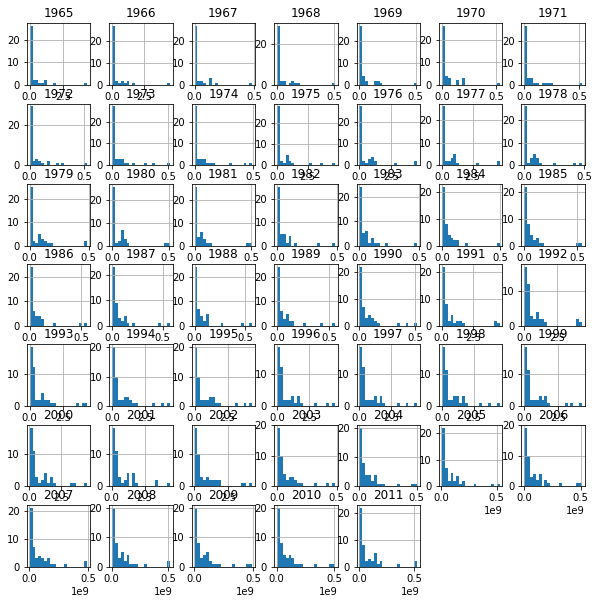

In [9]:
#Exploring data with histogram.
oil_prod.hist(bins= 20, figsize= (10,10));
#production data is right skewed, most nations are non-oil producing.

Describe to get overview of data

In [10]:
oil_prod.describe()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,3.600000e+01,3.700000e+01,3.700000e+01,3.900000e+01,3.900000e+01,3.900000e+01,4.000000e+01,4.200000e+01,4.200000e+01,4.200000e+01,...,4.700000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01
mean,3.594683e+07,3.797267e+07,4.064622e+07,4.224891e+07,4.560825e+07,5.049943e+07,5.210008e+07,5.250194e+07,5.731077e+07,5.679905e+07,...,7.528571e+07,7.614095e+07,7.974359e+07,8.053478e+07,8.080068e+07,8.075730e+07,8.152256e+07,7.956299e+07,8.118988e+07,8.215746e+07
std,7.897325e+07,8.259329e+07,8.808066e+07,9.054929e+07,9.323808e+07,9.857191e+07,9.959081e+07,1.018014e+08,1.079713e+08,1.084993e+08,...,9.652898e+07,1.040518e+08,1.084341e+08,1.102814e+08,1.100228e+08,1.089150e+08,1.102022e+08,1.069100e+08,1.091443e+08,1.160546e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.518000e+06,1.237410e+06,3.376000e+06,3.439000e+06,3.306000e+06,4.608000e+06,4.209776e+06,3.950356e+06,3.649308e+06,3.585000e+06
25%,5.984453e+05,6.310000e+05,1.723000e+06,1.337784e+06,2.341805e+06,4.007561e+06,3.303202e+06,3.597939e+06,3.801054e+06,3.924501e+06,...,1.350870e+07,1.278998e+07,1.408790e+07,1.442622e+07,1.581097e+07,1.450851e+07,1.383972e+07,1.409762e+07,1.375662e+07,1.241370e+07
50%,8.663003e+06,7.562912e+06,8.850564e+06,8.577000e+06,1.123391e+07,1.175993e+07,1.288440e+07,9.819683e+06,1.057493e+07,9.630694e+06,...,3.524200e+07,3.607350e+07,3.592160e+07,3.425400e+07,3.469700e+07,3.472435e+07,3.529371e+07,3.563111e+07,3.992964e+07,3.778876e+07
75%,2.502170e+07,2.392946e+07,2.574689e+07,2.725296e+07,3.070951e+07,4.566071e+07,4.716413e+07,5.356662e+07,6.406329e+07,6.827422e+07,...,1.031290e+08,1.071330e+08,1.052034e+08,9.858091e+07,1.035435e+08,1.074447e+08,1.075253e+08,1.067294e+08,1.130897e+08,1.152757e+08
max,4.276871e+08,4.545269e+08,4.842091e+08,5.028932e+08,5.113680e+08,5.334974e+08,5.258989e+08,5.278931e+08,5.146546e+08,4.913961e+08,...,4.241200e+08,4.838018e+08,5.043054e+08,5.248709e+08,5.124392e+08,4.923720e+08,5.134809e+08,4.942470e+08,5.051300e+08,5.258003e+08


##### Moving to 2nd Excel file

In [11]:
oil_proven.head()
# Dashed out null values instead of NAN, need to clean this up.
# These are proven resources, contrary to production values resources might
# be available, but not viable to produce.

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Algeria,1118480000,1102112000,1287616000,1257608000,1227600000,1203048000,1200320000,1168129600,1254880000,...,1543229600,1543229600,1543229600,1543229600,1609520000,1609520000,1673628000,1673628000,1664080000,1664080000
1,Angola,187550000,151131200,198734800,233926000,292850800,275255200,190960000,272800000,272800000,...,688820000,814580800,886600000,1213960000,1200456400,1232374000,1232374000,1232374000,1841400000,1841400000
2,Argentina,335134800,296213333,265925440,334148492,320403600,305536000,304581200,306354400,310978360,...,418910151,405613091,392652340,384717343,364803068,338000471,297387858,352834084,356825175,356825175
3,Australia,289551438,357156336,330131535,338281872,393275197,396192160,430337781,432654193,466542435,...,647050946,674504712,675620021,623457866,605698711,553364970,567091853,567091853,567091853,567151200
4,Azerbaijan,-,-,-,-,-,-,-,-,-,...,160679200,160679200,160679200,954800000,954800000,954800000,954800000,954800000,954800000,954800000


Checking the data types and empty cells for each column

In [12]:
oil_proven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 30 columns):
Country    48 non-null object
1980       48 non-null object
1981       48 non-null object
1982       48 non-null object
1983       48 non-null object
1984       48 non-null object
1985       48 non-null object
1986       48 non-null object
1987       48 non-null object
1988       48 non-null object
1989       48 non-null object
1990       48 non-null object
1991       48 non-null object
1992       48 non-null object
1993       48 non-null object
1994       48 non-null object
1995       48 non-null object
1996       48 non-null object
1997       48 non-null object
1998       48 non-null object
1999       48 non-null object
2000       48 non-null int64
2001       48 non-null int64
2002       48 non-null int64
2003       48 non-null int64
2004       48 non-null int64
2005       48 non-null int64
2006       48 non-null int64
2007       48 non-null int64
2008       48 non-null int64
dtypes

































Quick view histogram analysis


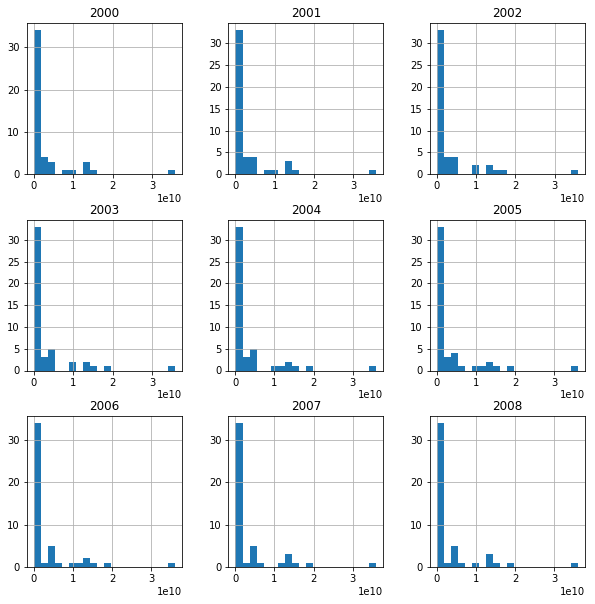

In [13]:
#Exploring data with histogram.
oil_proven.hist(bins= 20, figsize= (10,10));
#right skewed data

##### Moving to 3rd Excel file

In [14]:
oil_consume.head()
#Need to clean up dashed out values

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Algeria,1289000,1693000,1578000,1682000,1775000,2032000,2288000,2514000,2739000,...,9744000,10134000,10598000,11039396,11519500,12904556,14012890,14900000.0,14900000.0,NaN
1,Argentina,21952000,22678000,23224000,23733000,24671000,21942000,23491000,23162000,23189000,...,17107000,17558000,18401000,19676875,20555955,23192795,24219411,23700000.0,25700000.0,NaN
2,Australia,16902000,18120000,19812000,21892000,23425000,24451000,25803000,25784000,28206000,...,37970000,38275000,38791278,39838432,41414188,41732248,42461108,42200000.0,42600000.0,NaN
3,Austria,5534000,6068000,6491000,7513000,8253000,9071000,10127000,10923000,11831000,...,13040000,14136000,13755000,14170000,14195000,13394000,13421000,13000000.0,13000000.0,NaN
4,Azerbaijan,-,-,-,-,-,-,-,-,-,...,3665000,4272000,4579000,5347000,4868500,4496000,3340300,3200000.0,3300000.0,NaN


Checking the data types and empty cells for each column

In [15]:
# Checking data info
oil_consume.info()

# Mixed data type and 2011 column doesn't have any data so cannot use that 
# year for analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 48 columns):
Country    64 non-null object
1965       64 non-null object
1966       64 non-null object
1967       64 non-null object
1968       64 non-null object
1969       64 non-null object
1970       64 non-null object
1971       64 non-null object
1972       64 non-null object
1973       64 non-null object
1974       64 non-null object
1975       64 non-null object
1976       64 non-null object
1977       64 non-null object
1978       64 non-null object
1979       64 non-null object
1980       64 non-null object
1981       64 non-null object
1982       64 non-null object
1983       64 non-null object
1984       64 non-null object
1985       64 non-null int64
1986       64 non-null int64
1987       64 non-null int64
1988       64 non-null int64
1989       64 non-null int64
1990       64 non-null int64
1991       64 non-null int64
1992       64 non-null int64
1993       64 non-null int64
1994  

































Quick view histogram analysis


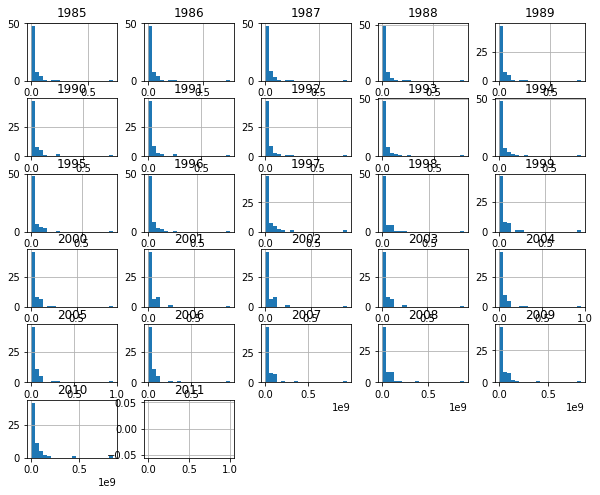

In [16]:
#Exploring data with histogram.
oil_consume.hist(bins = 20, figsize= (10,8));
#right skewed data

##### Moving to 4th Excel file

In [17]:
gni.head()
#large numeric values, will need to convert it into higher denomination

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.336378e+10,1.678050e+10,1.893645e+10,2.240887e+10,2.729843e+10,3.070364e+10,2.809452e+10,3.341694e+10,3.634080e+10,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.539573e+10,1.663143e+10,1.801537e+10,1.954609e+10,2.208245e+10,2.343622e+10,2.635538e+10,2.732051e+10,2.747576e+10,2.863173e+10
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.767201e+11,1.927724e+11,2.079228e+11,2.240600e+11,2.387023e+11,2.596084e+11,2.732739e+11,2.879803e+11,2.859299e+11,3.010651e+11


Checking the data types and empty cells for each column

In [18]:
# Checking data info
gni.info()
#1961-1979 data is empty
#2004 to 2009 has good data density, to be considered while selecting time range.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 52 columns):
Country    272 non-null object
1961       0 non-null float64
1962       0 non-null float64
1963       0 non-null float64
1964       0 non-null float64
1965       0 non-null float64
1966       0 non-null float64
1967       0 non-null float64
1968       0 non-null float64
1969       0 non-null float64
1970       0 non-null float64
1971       0 non-null float64
1972       0 non-null float64
1973       0 non-null float64
1974       0 non-null float64
1975       0 non-null float64
1976       0 non-null float64
1977       0 non-null float64
1978       0 non-null float64
1979       0 non-null float64
1980       122 non-null float64
1981       126 non-null float64
1982       130 non-null float64
1983       130 non-null float64
1984       133 non-null float64
1985       137 non-null float64
1986       139 non-null float64
1987       141 non-null float64
1988       142 non-null float64
1989  

Quick view histogram analysis

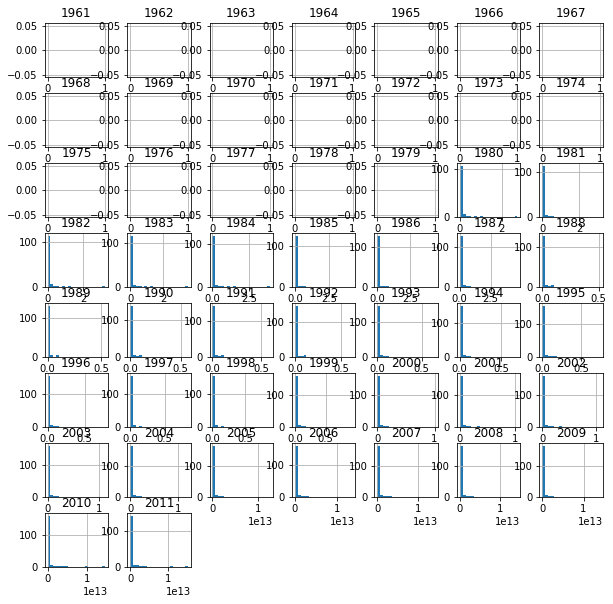

In [19]:
#Exploring data with histogram.
gni.hist(bins= 20, figsize= (10,10));
#right skewed data, nothing a

##  Case- 2: Smoking trends among Men and Women, and how it relates to life expectancy.

#### Utilizing the head, info, dtypes and histograms to get a good idea of dataset and plan accordingly for cleaning the data.

In [20]:
life_exp.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


Checking the 2005 histogram for distrubution as this year will be used later for analysis.

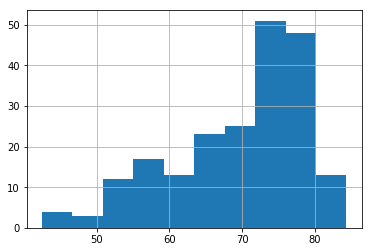

In [21]:
life_exp[2005].hist();

In [22]:
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 218 entries, Life expectancy to 2016
dtypes: float64(217), object(1)
memory usage: 442.9+ KB


##### Moving to 2nd Excel file

In [23]:
smk_female.head()

,Prevalence of current tobacco use among adults (>=15 years) (%) female,2000,2002,2005
0,Algeria,0.3,0.3,0.3
1,Angola,NaN,NaN,NaN
2,Benin,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Burkina Faso,11.2,11.2,11.2


In [24]:
smk_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
Prevalence of current tobacco use among adults (>=15 years) (%) female    192 non-null object
2000                                                                      131 non-null float64
2002                                                                      131 non-null float64
2005                                                                      131 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.1+ KB


Since the data is available for 3 years only, latest (2005) to be used for this analysis.

##### Moving to 3rd Excel file

In [25]:
smk_male.head()

,Prevalence of current tobacco use among adults (>=15 years) (%) male,2002,2005
0,Algeria,29.9,29.9
1,Angola,NaN,NaN
2,Benin,NaN,NaN
3,Botswana,NaN,NaN
4,Burkina Faso,22.0,22.0


In [26]:
smk_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
Prevalence of current tobacco use among adults (>=15 years) (%) male    192 non-null object
2002                                                                    131 non-null float64
2005                                                                    131 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.6+ KB


##### Moving to 4th Excel file

In [27]:
gnipc.head()

,"GNI per capita, Atlas method (current US$)",1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42740.0,44250.0,43760.0,44180.0,41670.0,40580.0,41010.0,43270.0,45655.0,48170.0
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,280.0,340.0,370.0,470.0,520.0,570.0,690.0,690.0,670.0,651.0
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1620.0,2350.0,3010.0,3490.0,3550.0,3690.0,4150.0,4730.0,4850.0,4973.0
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3120.0,3530.0,4080.0,4280.0,4360.0,4390.0,4370.0,4510.0,4460.0,4411.0


Checking for number of null values

In [28]:
gnipc['2005'].isnull().sum()

24

In [29]:
gnipc.shape

(249, 55)

#### Since all the files have 1st column named with file description, replacing the column 1 name with country name

In [30]:
#Replacing the column 1 name with country name
life_exp = life_exp.rename(columns={life_exp.columns[0]: 'Country'}) 
smk_male = smk_male.rename(columns={smk_male.columns[0]: 'Country'}) 
smk_female = smk_female.rename(columns={smk_female.columns[0]: 'Country'}) 
gnipc = gnipc.rename(columns={gnipc.columns[0]: 'Country'}) 

# Data Cleaning (Selecting Year and removing the null values)

Based on initial analysis of data type and null values in data, in this section we will proceed with further cleaning the data. For each of the sub data set, null values will be removed and time range of analysis will be set (depending on data available).

##  Case-1: Oil Reservoir,Production & Consumption trends. Also how GNI of oil producing nations appears.
Since the latest available data for oil_proven (proven oil resources) is for 2008, let's focus on 2008 data. <br> Data below from 4 df's: <br>
 >i)  oil_prod: Oil Produced <br>
 >ii) oil_proven: Proven oil resources <br>
 >iii)oil_consume: Oil consumed  <br>
 >iv) gni: total gross net income converted to international dollars using PPP rates <br>

### oil_prod : Oil Produced in TOE

Columns (Country and 2008(year)) are selected for analysis, null values dropped and renamed the column to prepare the data for merge later.

In [31]:
# Selecting columns
oil_prod = oil_prod[['Country',2008]]

# Dropping null values

oil_prod = oil_prod.dropna()

#Renaming column

oil_prod.rename (columns={2008: 'oil_production'}, inplace = True)
oil_prod.head()

,Country,oil_production
4,Algeria,8.562018e+07
7,Angola,9.347852e+07
10,Argentina,3.412383e+07
13,Australia,2.435672e+07
15,Azerbaijan,4.474850e+07


As the value of oil produced is in toe, for better visualization converting from toe (tonne of equivalent) to mtoe(million tonne of equivalent)

In [32]:
# Unit coversion
oil_prod['oil_production']= oil_prod['oil_production']*.0000001

### oil_proven : Proven oil resources in TOE

Columns (Country and 2008(year)) are selected for analysis, null values dropped and renamed the column to prepare the data for merge later.

In [33]:
# Selecting the country and specifying year
oil_proven = oil_proven[['Country',2008]]

# Dropping null values

oil_proven = oil_proven.dropna()

#renaming to prepare the data for merge later

oil_proven.rename (columns={2008: 'oil_proven'}, inplace = True)

oil_proven.head()

,Country,oil_proven
0,Algeria,1664080000
1,Angola,1841400000
2,Argentina,356825175
3,Australia,567151200
4,Azerbaijan,954800000


As the value of oil reservoir is in toe, for better visualization converting from toe (tonne of equivalent) to mtoe(million tonne of equivalent)

In [34]:
# Unit conversion
oil_proven['oil_proven'] = oil_proven['oil_proven']*.0000001

### oil_consume : Oil Consumed in TOE

Columns (Country and 2008(year)) are selected for analysis, null values dropped and renamed the column to prepare the data for merge later.

In [35]:
# Selecting the country and specifying year
oil_consume = oil_consume[['Country',2008]]

# Dropping null values

oil_consume = oil_consume.dropna()

#renaming to prepare the data for merge later

oil_consume.rename (columns={2008: 'oil_consume'}, inplace = True)
oil_consume.head()

,Country,oil_consume
0,Algeria,14012890
1,Argentina,24219411
2,Australia,42461108
3,Austria,13421000
4,Azerbaijan,3340300


As the value of oil consumption is in toe, for better visualization converting from toe (tonne of equivalent) to mtoe(million tonne of equivalent)

In [36]:
# Unit conversion
oil_consume['oil_consume'] = oil_consume['oil_consume']*.0000001

### gni_oil : total gross net income ($) converted to international dollars using PPP rates

Columns (Country and 2008(year)) are selected for analysis, null values dropped and renamed the column to prepare the data for merge later.

In [37]:
# Selecting the country and specifying year
gni_oil = gni.iloc[:,[0,48]]

# Dropping null values

gni_oil = gni_oil.dropna()

#renaming to prepare the data for merge later

gni_oil.rename (columns = {'2008' : 'gni_oil'}, inplace = True)
gni_oil.head()

,Country,gni_oil
1,Afghanistan,2.809452e+10
3,Albania,2.635538e+10
4,Algeria,2.732739e+11
7,Angola,8.468289e+10
9,Antigua and Barbuda,1.677932e+09


As the value of gni is in (\$) for better visualization converting from (\$) to million (m\$)

In [38]:
# Unit conversion
gni_oil['gni_oil'] = gni_oil['gni_oil']*.0000001

### Merging the data for charts

Cleaned up data is now merged using inner method. Also a consumption ratio is calculated, which will be used in next section for EDA. <br>
Merged data will be stored under oil_trend_gni.

In [39]:
oil_pro_merge = oil_proven.merge(oil_prod, how = 'inner', left_on = 'Country', right_on = 'Country')
oil_trend = oil_consume.merge(oil_pro_merge,how = 'inner', left_on = 'Country', right_on = 'Country')
oil_trend_gni = oil_trend.merge(gni_oil, how = 'inner', left_on = 'Country', right_on = 'Country')
oil_trend_gni ['consumption_ratio'] = oil_trend_gni['oil_consume']/oil_trend_gni['oil_production']
oil_trend_gni ['nation_category'] = np.where(oil_trend_gni['consumption_ratio'] < 1, 'exporter','importer')
oil_trend_gni.head(20)

,Country,oil_consume,oil_proven,oil_production,gni_oil,consumption_ratio,nation_category
0,Algeria,1.401289,166.408000,8.562018,27327.394520,0.163663,exporter
1,Argentina,2.421941,35.682517,3.412383,55984.440152,0.709751,exporter
2,Australia,4.246111,56.715120,2.435672,77227.646570,1.743301,importer
3,Azerbaijan,0.334030,95.480000,4.474850,6810.902768,0.074646,exporter
4,Brazil,10.534621,172.389413,9.924282,194582.398063,1.061500,importer
5,Canada,10.202961,390.262704,15.590015,128254.438036,0.654455,exporter
6,China,37.570980,210.900316,19.043960,824719.141949,1.972855,importer
7,Colombia,1.072379,18.577680,3.199686,38625.815760,0.335151,exporter
8,Denmark,0.892800,11.067299,1.403500,22227.020682,0.636124,exporter
9,Ecuador,0.928015,52.071614,2.741486,10584.750702,0.338508,exporter


##  Case- 2: Smoking trends among Men and Women, and how it relates to life expectancy.

Create the bins and label the data into world bank classes based on GNI per capita. <br>
Cleaning up GNI per capita data and renaming the column.

In [40]:
# Bin and cut into classes
gnipc_df = gnipc[['Country', '2005']] 
gnipc_df = gnipc_df.dropna() 
bin_edges = [0, 1005, 3955, 12235, 50000]
bin_names = ['lower','lower_middle', 'upper_middle', 'higher']
gnipc_df['wb_class'] = pd.cut(gnipc_df['2005'], bin_edges, labels=bin_names)

In [41]:
# Renaming the year column to income_pc for later analysis
gnipc_df.rename (columns={'2005': 'income_pc'}, inplace = True)

Cleaning up Female smokers data and renaming the column for merging later.

In [42]:
# selecting year 2005
smk_female_df = smk_female[['Country',2005]]

#dropping null values
smk_female_df = smk_female_df.dropna()

#renaming for later analysis
smk_female_df.rename (columns={2005: 'female_smoker'}, inplace = True)

Cleaning up Male smokers data and renaming the column for merging later.

In [43]:
# selecting year 2005
smk_male_df = smk_male[['Country',2005]]

#dropping null values
smk_male_df = smk_male_df.dropna()

#renaming for later analysis
smk_male_df.rename (columns={2005: 'male_smoker'}, inplace = True)

Cleaning up Life expectancy data and renaming the column for merging later.

In [44]:
# selecting year 2005
life_exp_df = life_exp[['Country',2005]]

#dropping null values
life_exp_df = life_exp_df.dropna()

#renaming for later analysis
life_exp_df.rename (columns={2005: 'life_expectancy'}, inplace = True)

### Merging the data for charts

In [45]:
smk_cmb = smk_female_df.merge(smk_male_df, how = 'inner', left_on = 'Country', right_on = 'Country')
life_trend = life_exp_df.merge(smk_cmb, how = 'inner', left_on = 'Country', right_on = 'Country')
life_trend_gni = gnipc_df.merge(life_trend,how = 'inner', left_on = 'Country', right_on = 'Country')
life_trend_gni.head()

,Country,income_pc,wb_class,life_expectancy,female_smoker,male_smoker
0,Andorra,40040.0,higher,84.3,29.2,36.5
1,Albania,2690.0,lower_middle,76.2,4.0,40.5
2,United Arab Emirates,38390.0,higher,75.2,2.6,26.1
3,Argentina,4990.0,upper_middle,75.3,25.4,34.6
4,Armenia,1520.0,lower_middle,71.8,3.7,55.1


### Creating masks for filtering data based on class (low and higher)

In [46]:
# Creating mask (low)
low= life_trend_gni.wb_class == 'lower'

In [47]:
# Creating mask (higher)
higher = life_trend_gni.wb_class == 'higher'

Checking mean of life expectancy difference between lower class and higher class.

In [48]:
# Calculating mean using mask
life_trend_gni.life_expectancy[low].mean()

59.4

In [49]:
# Calculating mean using mask
life_trend_gni.life_expectancy[higher].mean()

79.3037037037037

<a id='eda'></a>
# Exploratory Data Analysis

### Research Question 1: Which Countries are highest producer, consumer and owner (proven reservoir) of oil and how these characteristic reflect on the Gross Net Income (gni)?

#### Let's begin with how raw merged data looks in terms of oil consumption


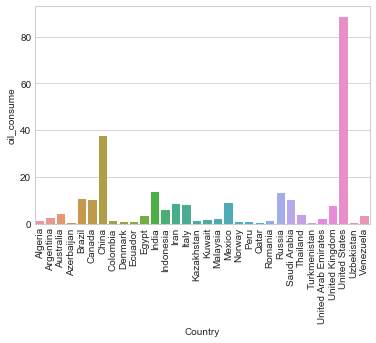

In [50]:
sns.set_style("whitegrid")

ax = sns.barplot(x = "Country", y = 'oil_consume',data = oil_trend_gni );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


As it's clear that there are many small contributor's. In order to reach conclusions on defined problem statement,I will focus on Top 15 for each category.

#### Top 15 oil consumer countries (oil_top_consumer)selected using .nlargest function

In [51]:
# Sorting and limiting to top 15
oil_top_consumer = oil_trend_gni.sort_values('oil_consume').nlargest(15,'oil_consume')

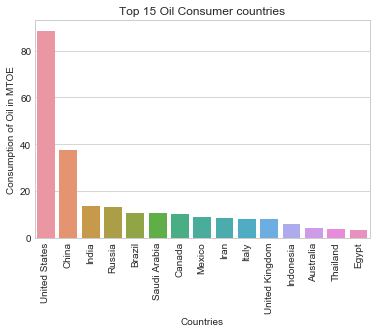

In [52]:
# Plot the values on bar chart
sns.set_style("whitegrid")
ax = sns.barplot(x = 'Country', y = 'oil_consume',data = oil_top_consumer );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel ('Consumption of Oil in MTOE')
ax.set_xlabel ('Countries')
ax.set_title("Top 15 Oil Consumer countries", size = 12);
sns.set(rc={'figure.figsize':(11.7,8.27)});

*** 
 Above chart clearly shows us that __US, China, India, Russia & Brazil__ are __top most oil consumers__ globally for year 2008.
***

### Top 15 oil producer countries (oil_top_producer)selected using .nlargest function

In [53]:
# Sorting and limiting to top 15
oil_top_producer = oil_trend_gni.sort_values('oil_production').nlargest(15,'oil_production')

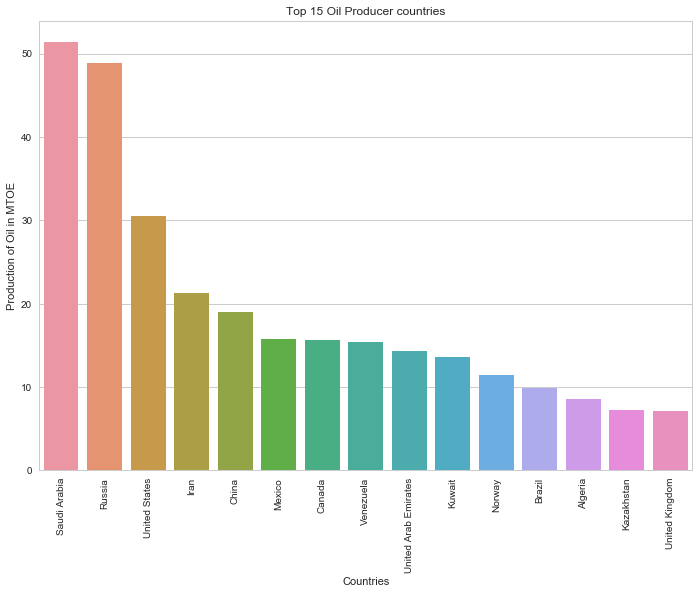

In [54]:
# Plot the values on bar chart
sns.set_style("whitegrid")

ax = sns.barplot(x = "Country", y = 'oil_production',data = oil_top_producer);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel ('Production of Oil in MTOE')
ax.set_xlabel ('Countries')
ax.set_title("Top 15 Oil Producer countries", size = 12);
sns.set(rc={'figure.figsize':(11.7,8.27)});

*** 
Contrary to previous chart, Top producers are not same as Top consumers. <br>
__Saudi Arabia, Russia, US, Iran and China__ are __top most oil producers__ globally for year 2008.
***

### Top 15 Proven oil reservoir countries (oil_top_proven)selected using .nlargest function

In [55]:
# Sorting and limiting to top 15
oil_top_proven = oil_trend_gni.sort_values('oil_proven').nlargest(15,'oil_proven')

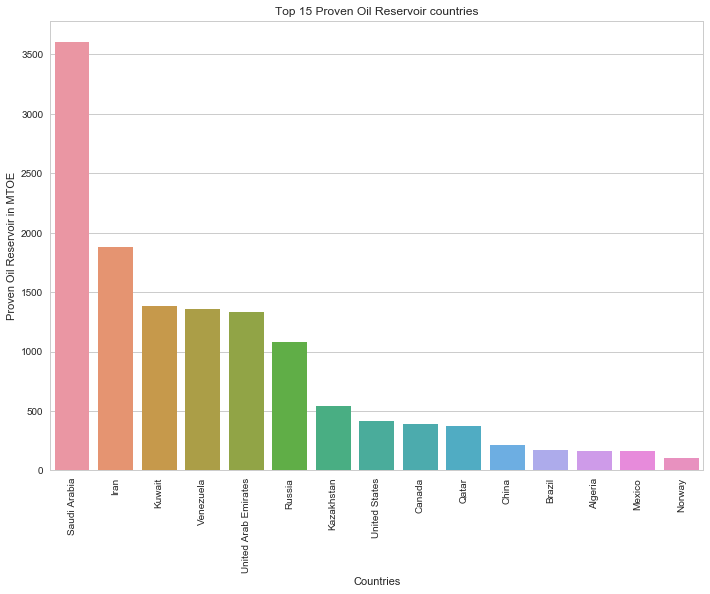

In [56]:
# Plot the values on bar chart
sns.set_style("whitegrid")
ax = sns.barplot(x = "Country", y= 'oil_proven',data = oil_top_proven);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel ('Proven Oil Reservoir in MTOE')
ax.set_xlabel ('Countries')
ax.set_title("Top 15 Proven Oil Reservoir countries", size = 12);
sns.set(rc={'figure.figsize':(11.7,8.27)});

*** 
This chart shows us coutries with biggest proven reservoirs, however not all of them are biggest producers when compared to previous chart. <br>
__Saudi Arabia & Iran__ are the only 2 in Top 5 that are common countries.<br>
Rest __Kuwait, Venenzuela and UAE__ are among __top most proven oil reservoirs__ globally for year 2008.<br>

***

#### Exploring further relationships among factors

Quick view of chart shows that we have outliers on x-axis (with a very big proven reservior), and y-axis (low proven reservoir but high consumption). 

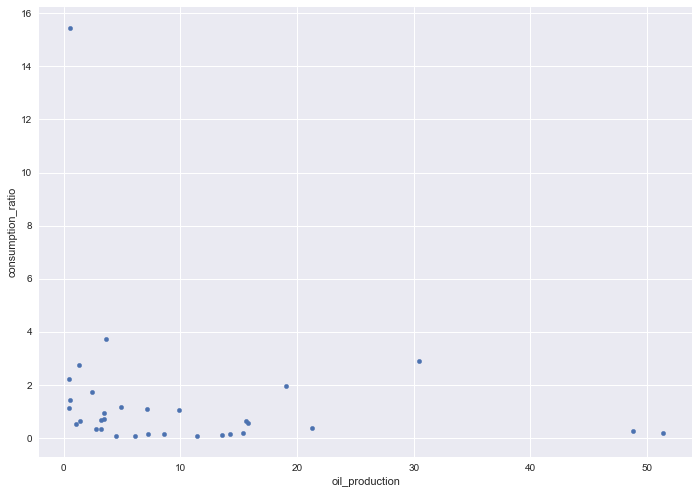

In [57]:
# Quick view scatter plot
oil_trend_gni.plot(y = 'consumption_ratio', x = 'oil_production', kind= 'scatter');

In order to deal with this outlier, I filtered the df with multiple conditions.
Similar result can be obtained with xlim, ylim but I want to use the same data in further analysis. Hence filter is created.

#### Filter created to avoid plotting outliers

In [58]:
#Filter applied
oil_trend_gni_filtered = oil_trend_gni[(oil_trend_gni['consumption_ratio'] <4) & (oil_trend_gni['gni_oil'] <400000)]

Scatter chart after filter applied, now the spread appears to be better for analysis.

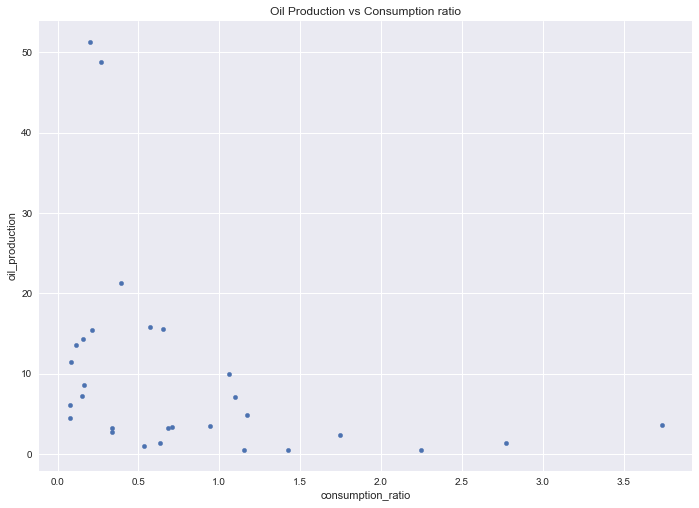

In [59]:
# Scatter plot
sns.set_style("darkgrid")
oil_trend_gni_filtered.plot(x = 'consumption_ratio', y = 'oil_production', 
                            kind= 'scatter',title = 'Oil Production vs Consumption ratio');

***
This is simple graphical representation of countries behavior with regards to Consumption ratio and production. <br>
It is clear that with similar oil production levels, the consumption ratio is varying across countries. <br>
***

####  To analyze the behaviour of Nation's Gross Income based on their consumption.

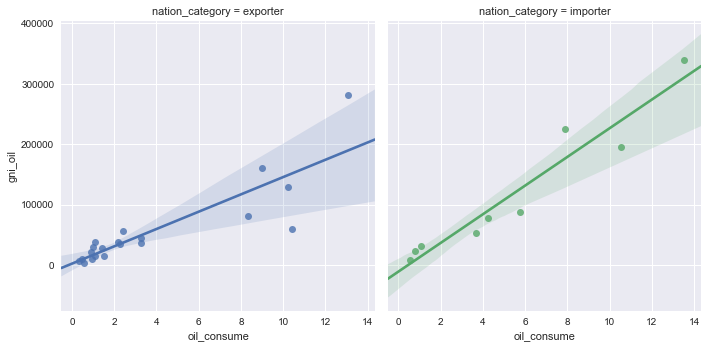

In [60]:
sns.lmplot (y= "gni_oil", x = "oil_consume", data = oil_trend_gni_filtered,
            hue="nation_category",col ="nation_category");

#### From 2 charts above, below are the observations:
   > Number of exporters are more than importers <br>
     Slope for Importers GNI is higher than exporters. <br>
     Since the countries are importing and consuming heavily, indicates that the infrastructure is developed and contributing to higher GNI.(Limitation: Need more supporting data to demostrate the relationship)<br> 
     Majority of exporting nation has lower GNI and consumption concurrently, indicating they are relying on exports in other sectors from different countries. (Limitation: Need more supporting data to demostrate the relationship)


### Research Question 2 : Smoking trends among Men and Women, how it relates to life expectancy and how these parameters vary with different class in society?

### Firstly let's compare the smoking trend among men and women 

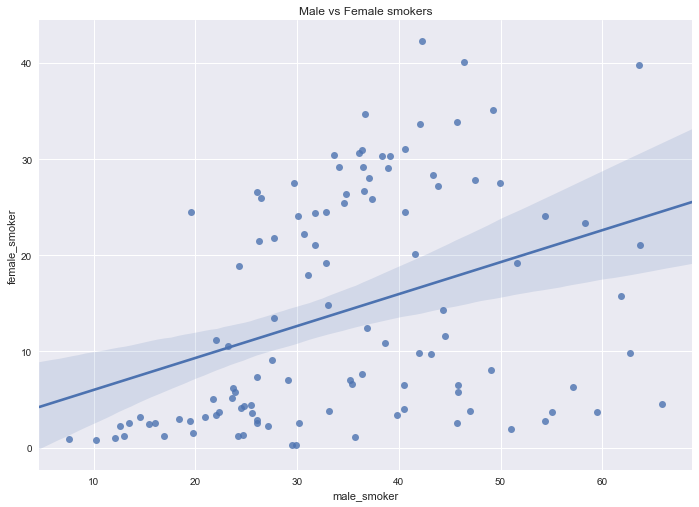

In [61]:
# Plotting the data
ax= sns.regplot(x= "male_smoker", y = "female_smoker", data = life_trend_gni)
ax.set_title("Male vs Female smokers", size = 12);

***
Above chart indicates higher percentage of male smokers compared to the female smokers globally. In next few charts, more details will be explored.
***

Next, let's explore how the smoking patterns vary among different class of society

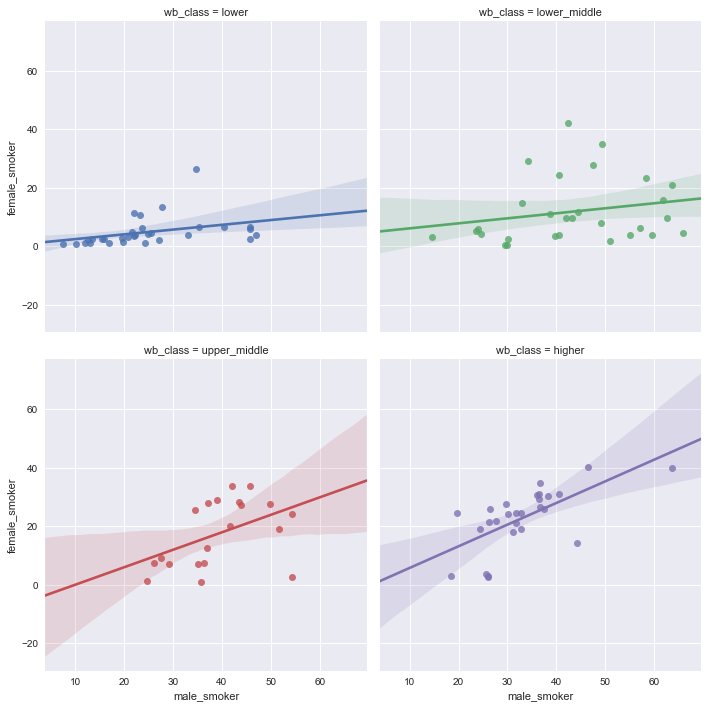

In [62]:
# Plot the split with class in society
sns.lmplot(x= "male_smoker", y = "female_smoker", data = life_trend_gni,
            hue="wb_class",col ="wb_class",col_wrap=2);

***
#### Below are the observations:
   > i.Female in lower class smoke less in most of the countries <br>
    ii. In lower_middle class distribution starts to spread out and % of male smokers increase significantly<br>
    iii. In upper middle women are smoking above average, and men are smoking slightly less than lower_middle.<br>
    iv. Female in higer class smoke in most of countries, men on other hand have sligtely less % of smokers compared to all other classes.
***

To visualize other correlations, let's utlize pairplots

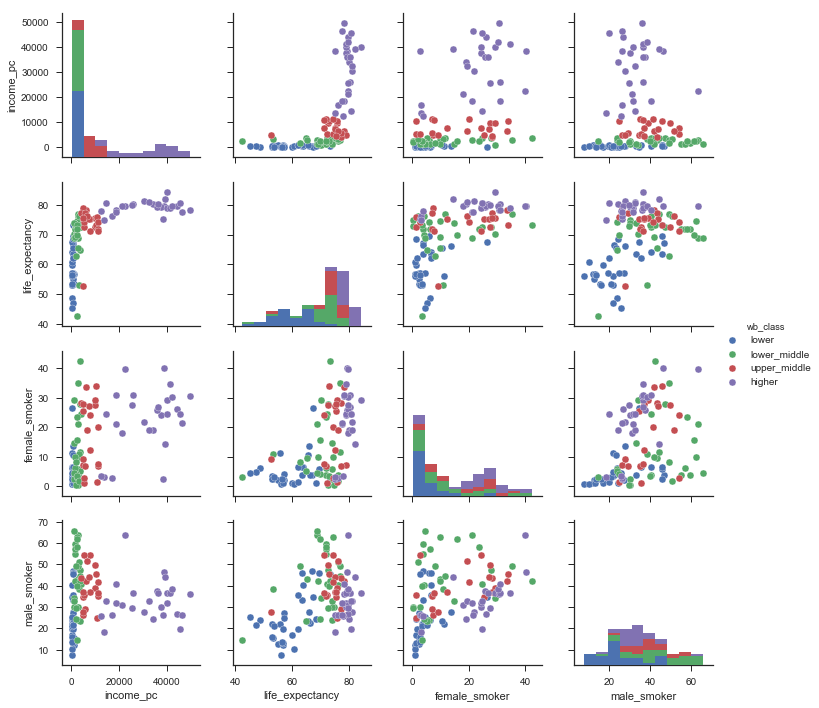

In [63]:
# Pair plots
sns.set(style="ticks")

sns.pairplot(life_trend_gni, hue="wb_class");

***
#### Observations from Pairplots:
   > i. Income distribution among classes is right skewed, mostly comprising of lower and lower_middle on left end.<br>
     ii. Life expectancy among lower, lower_middle and upper_middle doesn't vary too much.<br>
     iii.Lower and middle class females tend to smoke less generally (cluster on left lower end), whereas female from higher class and high income smoke in most of the cases.<br>
     iv.Most of male smokers are from lower and middle section of society <br>
     v. Life expectency is non linear to smoking percentages (make and female) 
 ***

Lastly, let's explore the data for certain class utilizing the masks created in previous section.

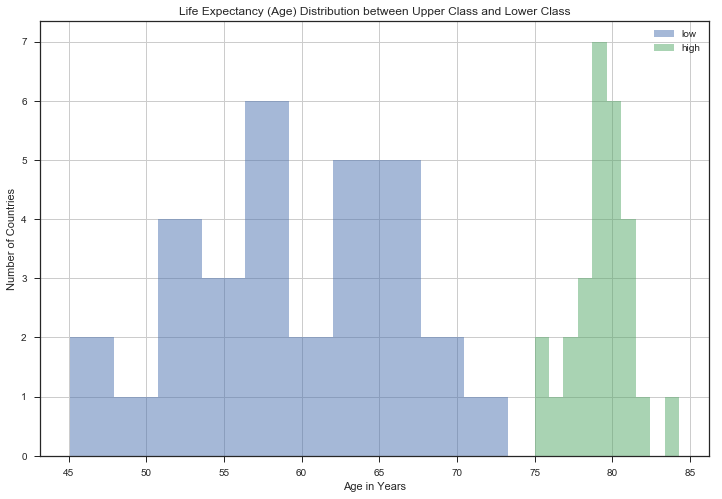

In [64]:
# Histogram using masks
life_trend_gni.life_expectancy[low].hist(label = 'low', alpha = 0.5, bins = 10, figsize = (12,8))
life_trend_gni.life_expectancy[higher].hist(label = 'high', alpha = 0.5, bins = 10, figsize = (12,8))
plt.xlabel('Age in Years')
plt.ylabel('Number of Countries')
plt.title('Life Expectancy (Age) Distribution between Upper Class and Lower Class')
plt.legend( );

***
#### Observations from Histogram:
   > i. There is a clear relation between income and life expectancy <br>
     ii. People with higher income (green) outlize the people with lowest income (blue) by average 20 years (mean calculated earlier).
 ***

<a id='conclusions'></a>
## Conclusions

Based on questions set in begining and analysis performed, below is my conclusion for each case.

__Case-1: Oil Economics__ 
 > I found that the Nations with largest proven reservoirs are not always the one producing most. There could be several social/political/economical reasons for that, which were not covered as part of this analysis. <br>
 > Similarly breaking the nations down into importer and exporter categories (based on consumption ratio) helps to understand the dynamics but need more data to establisht the facts. <br>
 
 __Case-2: Smoking Behaviours__
 > With limited amount of data, I managed to explore the relationships among different sections of society as intended.
 > One of the area not explored was correlating the findings to job sectors and working population for each country on top of sections of society.
 > Using binning and cut function was instrumental in this analysis.


### Limitations
1. Inconsistency in data availability, for some datasets data was starting from 1965 and while others it was only limited to 3 years. <br>
2. During merging, had to make a choice either to have a lot of null values (Right/Left/Outer Join)or just go with Inner join (which I opted for) to get clean data. With this approach I had to sacrifice some of countries data.

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-Gapminder_V3.ipynb'])

0